## Explanatory Analysis
#### Through below Anayis and Visualizations, I'm depicting common patterns and relationship between different variables of Ford GoBike Bike sharing service 
Visualizations are based on Ford GoBike dataset hosted on https://www.lyft.com/bikes/bay-wheels/system-data. 
This data set includes information about individual rides made in a bike-sharing service for the year 2017. 

In [2]:
#importing libararies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing clean dataframe
df_clean = pd.read_csv(r'C:\Users\Bharat\Downloads\Udacity Project\clean_data.csv')
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age,distance,l_age,month,day
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,96,Laguna St at Hayes St,37.776435,-122.426244,96,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,32,943.0,30s,December,Sun
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,88,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,88,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,54,3071.0,50s,December,Sun
2,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,3167,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3167,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,22,637.0,20s,December,Sun
3,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,3539,Addison St at Fourth St,37.866249,-122.299371,3539,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991,Female,28,0.0,20s,December,Sun
4,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,2311,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,2311,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990,Male,29,1518.0,20s,December,Sun


In [4]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444977 entries, 0 to 444976
Data columns (total 20 columns):
duration_sec               444977 non-null int64
start_time                 444977 non-null object
end_time                   444977 non-null object
start_station_id           444977 non-null int64
start_station_name         444977 non-null object
start_station_latitude     444977 non-null float64
start_station_longitude    444977 non-null float64
end_station_id             444977 non-null int64
end_station_name           444977 non-null object
end_station_latitude       444977 non-null float64
end_station_longitude      444977 non-null float64
bike_id                    444977 non-null int64
user_type                  444977 non-null object
member_birth_year          444977 non-null int64
member_gender              444977 non-null object
member_age                 444977 non-null int64
distance                   444977 non-null float64
l_age                      444078 non-nu

In [5]:
#Re-converting datatypes
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)
df_clean.member_age = df_clean.member_age.astype(int)
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.user_type = df_clean.user_type.astype('category')

In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444977 entries, 0 to 444976
Data columns (total 20 columns):
duration_sec               444977 non-null int64
start_time                 444977 non-null datetime64[ns]
end_time                   444977 non-null datetime64[ns]
start_station_id           444977 non-null object
start_station_name         444977 non-null object
start_station_latitude     444977 non-null float64
start_station_longitude    444977 non-null float64
end_station_id             444977 non-null object
end_station_name           444977 non-null object
end_station_latitude       444977 non-null float64
end_station_longitude      444977 non-null float64
bike_id                    444977 non-null object
user_type                  444977 non-null category
member_birth_year          444977 non-null int32
member_gender              444977 non-null category
member_age                 444977 non-null int32
distance                   444977 non-null float64
l_age            

#### Bikes Usage Duration:
Bikes are most commonly used in between 300 to 1200 seconds i.e., between 5 minutes and 20 minutes

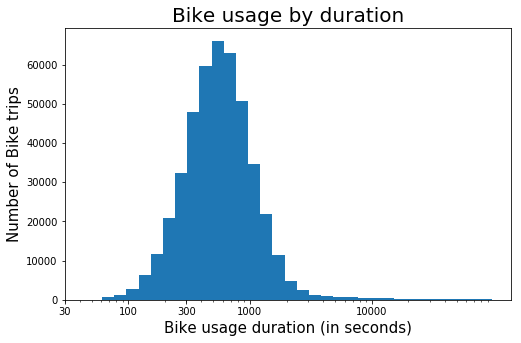

In [14]:
plt.figure(figsize=[8,5]);
log_data = np.log10(df_clean.duration_sec)
bin_edges = 10 ** np.arange(log_data.min(), log_data.max() + 0.1, 0.1)
plt.hist(data=df_clean, x=df_clean.duration_sec, bins=bin_edges)
ticks = [30,100,300,1000,10000]
plt.xscale('log')
plt.xticks(ticks=ticks, labels=ticks)
plt.xlabel('Bike usage duration (in seconds)', fontsize=15)
plt.ylabel('Number of Bike trips', fontsize=15)
plt.title('Bike usage by duration', fontsize=20);

#### Users Age Distribution
Most of the users are in between 30 to 45 years of age with average around 35 years

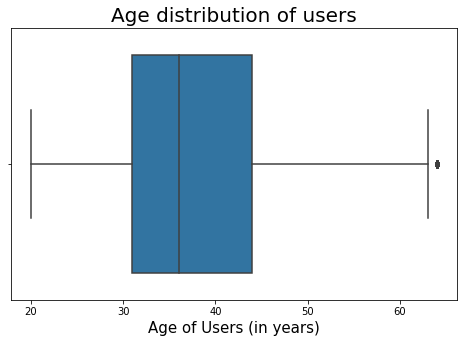

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x='member_age')
plt.xlabel('Age of Users (in years)', fontsize=15)
plt.title('Age distribution of users', fontsize=20);

#### Bikes Usage by Distance
Most common distances covered in trips are between 500 metres (0.5 Km) to 2000 meters (2 Km).

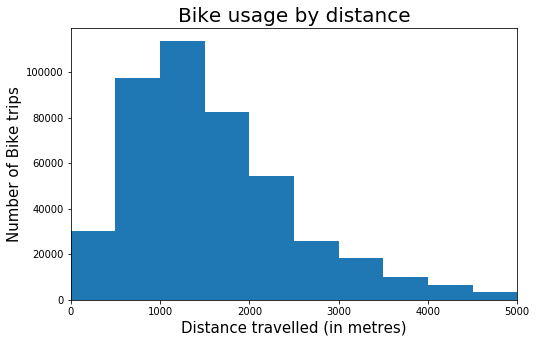

In [22]:
#plotting histogram of distance variable
plt.figure(figsize=[8,5]);
bin_edges = np.arange(0, 62500, 500)
plt.hist(data = df_clean, x ='distance', bins = bin_edges)
plt.xlim(0, 5000)
plt.xlabel('Distance travelled (in metres)', fontsize=15)
plt.ylabel('Number of Bike trips', fontsize=15)
plt.title('Bike usage by distance', fontsize=20);

#### Trips share by User type
Around 90% users are Subscribers (users that have a membership) of bike service and 10% are customers (users that don't have a membership)

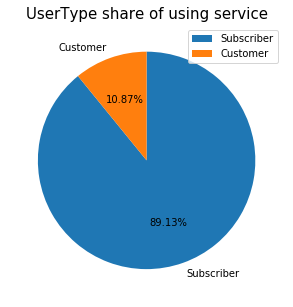

In [35]:
plt.figure(figsize=[5,5]);
count=df_clean.user_type.value_counts()
plt.pie(count, labels=count.index, startangle=90, counterclock=False, autopct='%1.2f%%')
plt.title('UserType share of using service', fontsize=15);
plt.legend(loc=1);

#### Gender Distribution
Males are using the service more frequently than females and others.
<br>
76.7% users of this service are Males, 21.9% are Females and 1.4% Others

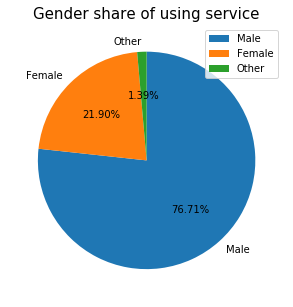

In [36]:
plt.figure(figsize=[5,5]);
count=df_clean.member_gender.value_counts()
plt.pie(count, labels=count.index, startangle=90, counterclock=False, autopct='%1.2f%%')
plt.title('Gender share of using service', fontsize=15);
plt.legend(loc=1);

#### Trips Distribution based on days by different age group
Service is used more commonly on weekdays than weekends and majority of people with age group 30s.

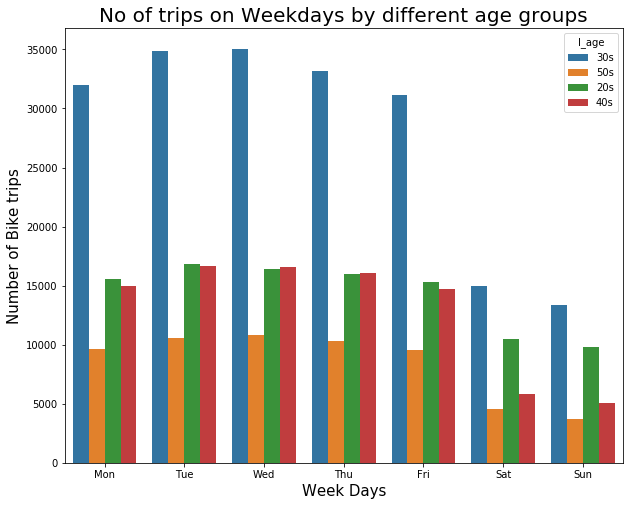

In [41]:
plt.figure(figsize=[10,8])
order= ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.countplot(data=df_clean, x='day', hue='l_age',order=order)
plt.xlabel('Week Days', fontsize=15)
plt.ylabel('Number of Bike trips', fontsize=15)
plt.title('No of trips on Weekdays by different age groups', fontsize=20);

####  Trips Distribution based on UserTypes and Days
Customers use the bike sharing system more often on weekends. Subscribers use the bike sharing service mainly on weekdays.

<Figure size 720x576 with 0 Axes>

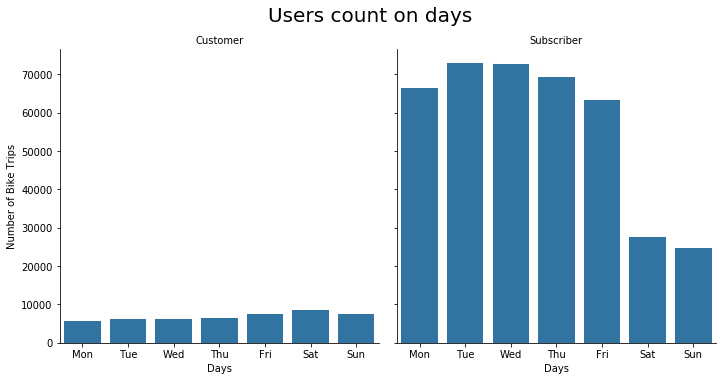

In [54]:
plt.figure(figsize=[10,8])
base_color = sns.color_palette()[0]
order= ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
g = sns.catplot(data=df_clean, x='day', col="user_type", order=order, color=base_color, kind='count')
g.set_axis_labels('Days', 'Number of Bike Trips')
g.set_titles('{col_name}')
plt.suptitle('Users count on days', fontsize=20, y=1.05);

#### Trips frequency Distribution by User Types and Gender
For Subscribers segment, number of bike trips are much larger for Males than Females. 
<br>
In Customers segment, even though the rides taken by males are larger but proportional difference by Males and Females is not that large as compared to Subscribers.

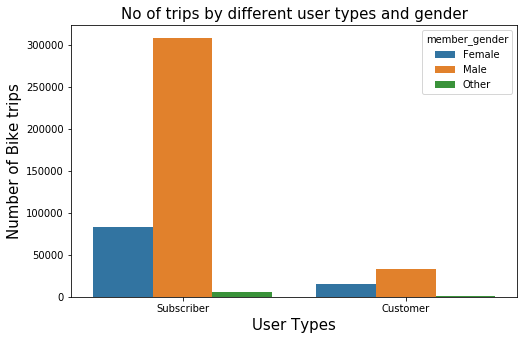

In [50]:
plt.figure(figsize=[8,5]);
sns.countplot(data=df_clean, x="user_type", hue="member_gender", order=df_clean.user_type.value_counts().index)
plt.xlabel('User Types', fontsize=15)
plt.ylabel('Number of Bike trips', fontsize=15)
plt.title('No of trips by different user types and gender', fontsize=15);

#### Trips Duration Distribution against Users Age by different Customer Type
Highest duration of Customers are of 500 to 1000s and ages are between 30 - 35 year old. After this, expanding from 500s to 1500s and ages from 25 to 40
<br>
Highest duration of Subscribers are starting from 0s to 500s and ages are between 30 - 35 year old. After this, expanding from 100s to 1000s and ages from 25 to 45

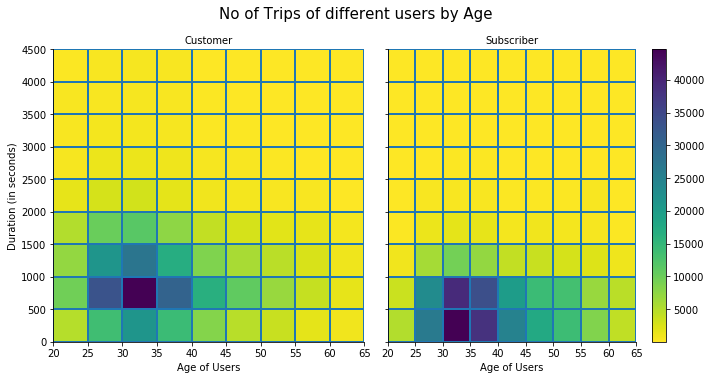

In [55]:
xbin = np.arange(df_clean['member_age'].min(), df_clean['member_age'].max()+5, 5)
ybin = np.arange(0, 5000, 500)

g = sns.FacetGrid(data = df_clean, col = 'user_type',height=5)
g.map(plt.hist2d, 'member_age','duration_sec', cmin=0.5, cmap = 'viridis_r', bins=[xbin, ybin])

g.set_axis_labels('Age of Users', 'Duration (in seconds)')
g.set_titles('{col_name}')
plt.suptitle('No of Trips of different users by Age', fontsize=15, y=1.05);
plt.colorbar();

## Summary
Renting a bike is a healthy and environment friendly way of commuting around in urban areas, both for work during weekdays and fun during weekends. Ford GoBike Service provides this hassle free way of commuting to move aroud the city.
There are two types of clients using the service: Subscribers who are daily commuters, taking short trips to and fro from work, renting commonly on weekdays, second, customers, who take bike trips occasionally during weekends to explore the Area.

### Analysis Summary

-	Bikes are used mostly between 5 minutes and 20 minutes
-	Most of shared bikes travelled between 0.5 Kilometers to 2 Kilometers
-	89.13% of user base is Subscriber (Users with a membership) and remaining 10.87% is Customers (Users without any membership)
-	Male vs Female Users: 76.7% users are Male and 21.9% are Females
-	Mostly people are renting bikes during Weekdays than weekends with most common age period is people in 30s.
-	Weekday vs Weekend: Subscribers use the bike sharing system mainly on weekdays. Customers use the bike sharing system more often on weekends
-	Customers trips are usually longer than for Subscribers most probably as they prefer bike rides occasionally around weekends
-	For Subscribers, Number of bike trips are much larger for Males than Females. This some change in Customers segment as even though the rides taken by males are larger but proportion difference by Males and Females is not that much large as compared to Subscribers.
-	Highest duration of Customers are of 500 to 1000s and ages are between 30 - 35 years. Highest duration of Subscribers are starting from 0s to 500s and ages are between 30 - 35 years.
